# Bay Wheels Ride Data Exploration and Visualization

## Preliminary Wrangling

[Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels) (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. The dataset used for this exploratory analysis consists of [monthly individual trip data](https://www.lyft.com/bikes/bay-wheels/system-data) from January 2018 to December 2018 in CSV format covering the greater San Francisco Bay area, also available [here](https://s3.amazonaws.com/baywheels-data/index.html).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

### Gathering and Assessing Data

In [2]:
# only ran once to append all monthly trip data together

folder_name = 'Data'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
result = pd.concat(frames, ignore_index=True)
print(result.shape)
result.sample(5)

(1863721, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
758590,451,2018-06-11 06:54:26.2790,2018-06-11 07:01:57.5240,160.0,West Oakland BART Station,37.805318,-122.294837,218.0,DeFremery Park,37.812331,-122.285171,3538,Subscriber,1971.0,Male,No
666276,266,2018-06-25 07:30:41.1230,2018-06-25 07:35:07.6020,123.0,Folsom St at 19th St,37.760594,-122.414817,113.0,Franklin Square,37.764555,-122.410345,2576,Subscriber,1994.0,Male,No
1436429,245,2018-10-25 15:32:27.2220,2018-10-25 15:36:32.7140,97.0,14th St at Mission St,37.768265,-122.420110,109.0,17th St at Valencia St,37.763316,-122.421904,2346,Subscriber,1986.0,Female,No
1134272,475,2018-08-13 11:42:20.9890,2018-08-13 11:50:16.6110,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,535,Subscriber,1987.0,Female,No
441694,682,2018-04-02 07:17:54.2960,2018-04-02 07:29:16.3540,218.0,DeFremery Park,37.812331,-122.285171,160.0,West Oakland BART Station,37.805318,-122.294837,1687,Subscriber,1983.0,Male,No


In [3]:
# save the appended result to a .csv for further usage

result.to_csv('fordgobike_trips_2018.csv', index=False)

In [4]:
biketrips18 = pd.read_csv('fordgobike_trips_2018.csv')
biketrips18.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [7]:
biketrips18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [9]:
biketrips18.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [10]:
biketrips18.duplicated().sum()

0

In [11]:
biketrips18.member_gender.value_counts()

Male      1288085
Female     438188
Other       27081
Name: member_gender, dtype: int64

In [12]:
biketrips18.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [13]:
biketrips18.bike_share_for_all_trip.value_counts()

No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64

### Cleaning Data

In [14]:
# make a copy of the dataframe 
# issue 1: fix multiple fields that are not in the correct dtype

trips18 = biketrips18.copy()
trips18['start_time'] = pd.to_datetime(trips18['start_time'])
trips18['end_time'] = pd.to_datetime(trips18['end_time'])

trips18['start_station_id'] = trips18['start_station_id'].astype('str')
trips18['end_station_id'] = trips18['end_station_id'].astype('str')
trips18['bike_id'] = trips18['bike_id'].astype('str')

trips18['user_type'] = trips18['user_type'].astype('category')
trips18['member_gender'] = trips18['member_gender'].astype('category')

trips18.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null datetime64[ns]
end_time                   1863721 non-null datetime64[ns]
start_station_id           1863721 non-null object
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1863721 non-null object
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null object
user_type                  1863721 non-null category
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null category
bike_share_for_all_trip    1863721 non-null object
dtypes: category(2), datetime64[ns](2), float64

In [15]:
# issue 2: add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

trips18['duration_minute'] = trips18['duration_sec']/60

trips18['start_date'] = trips18.start_time.dt.strftime('%Y-%m-%d')
trips18['start_hourofday'] = trips18.start_time.dt.strftime('%H')
trips18['start_dayofweek'] = trips18.start_time.dt.strftime('%A')
trips18['start_month'] = trips18.start_time.dt.strftime('%B')

trips18.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,1986.0,Male,No,1254.733333,2018-01-31,22,Wednesday,January
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2815,Customer,NaN,NaN,No,1423.700000,2018-01-31,16,Wednesday,January
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,3039,Customer,1996.0,Male,No,1192.933333,2018-01-31,14,Wednesday,January
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,...,321,Customer,NaN,NaN,No,1017.933333,2018-01-31,14,Wednesday,January
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,617,Subscriber,1991.0,Male,No,666.100000,2018-01-31,19,Wednesday,January


In [16]:
# issue 3: add a new column calculating riders' age from 'member_birth_year'

trips18['member_age'] = 2019 - trips18['member_birth_year']
trips18.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_minute,member_age
count,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,3.776678e+01,-1.223492e+02,3.776690e+01,-1.223487e+02,1.983088e+03,1.428838e+01,3.591204e+01
std,2.370379e+03,1.057689e-01,1.654634e-01,1.056483e-01,1.650597e-01,1.044289e+01,3.950631e+01,1.044289e+01
min,6.100000e+01,3.726331e+01,-1.224737e+02,3.726331e+01,-1.224737e+02,1.881000e+03,1.016667e+00,1.900000e+01
25%,3.500000e+02,3.777106e+01,-1.224114e+02,3.777106e+01,-1.224094e+02,1.978000e+03,5.833333e+00,2.800000e+01
50%,5.560000e+02,3.778107e+01,-1.223974e+02,3.778127e+01,-1.223971e+02,1.985000e+03,9.266667e+00,3.400000e+01
75%,8.720000e+02,3.779625e+01,-1.222865e+02,3.779728e+01,-1.222894e+02,1.991000e+03,1.453333e+01,4.100000e+01
max,8.636600e+04,4.551000e+01,-7.357000e+01,4.551000e+01,-7.357000e+01,2.000000e+03,1.439433e+03,1.380000e+02


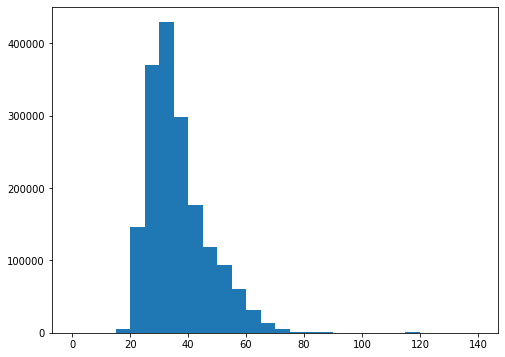

In [17]:
# plot the distribution of members' age, visually examine for some outliers over 100 yrs old

plt.figure(figsize=[8, 6])
bins = np.arange(0, trips18['member_age'].max()+5, 5)
plt.hist(trips18['member_age'].dropna(), bins=bins);

In [18]:
# issue 4: filter out outlier ages from visually examination of the distribution above
# issue 5: cast 'member_birth_year' and 'member_age' to integer instead of float type

trips18 = trips18.query('member_age <= 70')
trips18['member_birth_year'] = trips18['member_birth_year'].astype('int')
trips18['member_age'] = trips18['member_age'].astype('int')
trips18.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745188 entries, 0 to 1863719
Data columns (total 22 columns):
duration_sec               1745188 non-null int64
start_time                 1745188 non-null datetime64[ns]
end_time                   1745188 non-null datetime64[ns]
start_station_id           1745188 non-null object
start_station_name         1733750 non-null object
start_station_latitude     1745188 non-null float64
start_station_longitude    1745188 non-null float64
end_station_id             1745188 non-null object
end_station_name           1733750 non-null object
end_station_latitude       1745188 non-null float64
end_station_longitude      1745188 non-null float64
bike_id                    1745188 non-null object
user_type                  1745188 non-null category
member_birth_year          1745188 non-null int32
member_gender              1745188 non-null category
bike_share_for_all_trip    1745188 non-null object
duration_minute            1745188 non-null float

### What is the structure of your dataset?

The original combined data contains approximately 1,860,000 individual trip records with 16 variables collected. The variables can be divided into 3 major categories:
- trip duration: `duration_sec`, `start_time`, `end_time`


- station info: `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`


- member info (anonymized): `bike_id`, `user_type`, `member_birth_year`, `member_gender`, `bike_share_for_all_trip`

Derived features/variables to assist exploration and analysis:
- trip info: `duration_minute`, `start_date`, `start_hourofday`, `start_dayofweek`, `start_month`


- member: `member_age`

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in exploring the bike trips' duration and rental events occurrance patterns, along with how these relate to the riders' characteristics, i.e. their user type, gender, age, etc, to get a sense of how and what people are using the bike sharing service for. Sample questions to answer: When are most trips taken in terms of time of day, day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Each trip's start date/time and duration information will help understanding how long a trip usually takes and when. The member information like user type, gender and age will help us find out who are the main target customer groups, use the different groups to summarize bike usage data to see if there is any special pattern associated with a specific group of riders.

## Univariate Exploration

A series of plots to first explore the trips distribution over hour-of-day, day-of-week and month.

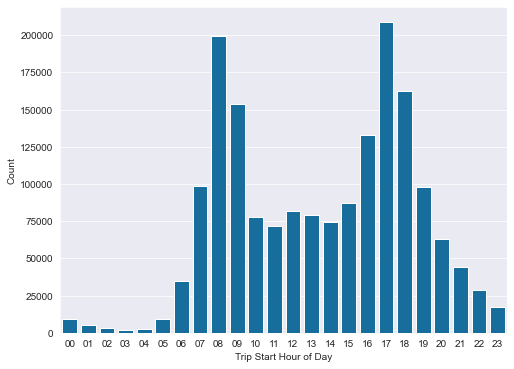

In [19]:
# trip distribution over day hours

plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=trips18, x='start_hourofday', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

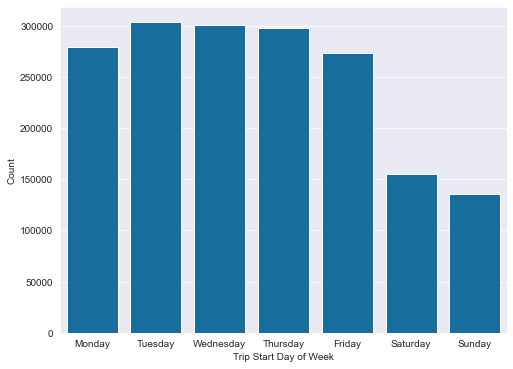

In [20]:
# trip distribution over weekdays
# issue 6: cast 'start_dayofweek' to category dtype

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
trips18['start_dayofweek'] = trips18['start_dayofweek'].astype(weekdaycat)

sb.countplot(data=trips18, x='start_dayofweek', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

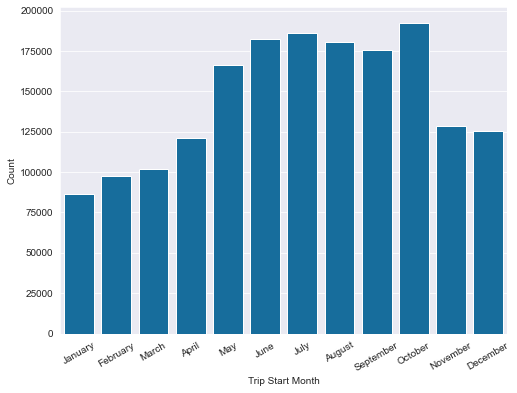

In [21]:
# trip distribution over months
# issue 7: cast 'start_month' to category dtype for easy plotting

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
trips18['start_month'] = trips18['start_month'].astype(monthcat)

sb.countplot(data=trips18, x='start_month', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');

The trip distribution over day hours peaks around two timeframes, 8am-9am and 17pm-18pm, during typical rush hours. Looking in combined with the trip distribution over day of week plot, it is quite obvious that the majority of rides happened on work days (Mon-Fri) and primary usage is probably for commuting. In the 12 months in 2018, October had the most ride trips compared to the others, but overall it was the most popular during summer time (May-Sept), probably due to the weather in the area.   

The next several plots are around members/users to see what makes up of the riders.

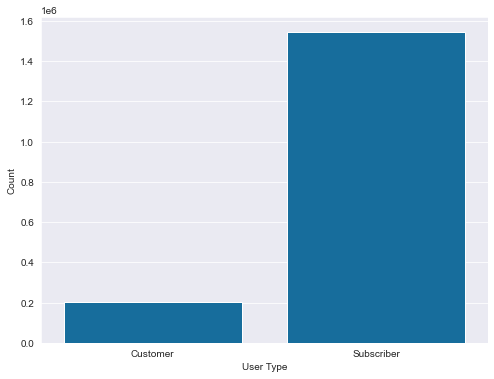

In [22]:
sb.countplot(data=trips18, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');

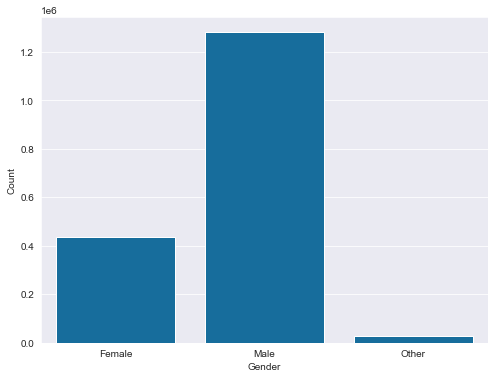

In [23]:
sb.countplot(data=trips18, x='member_gender', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Count');

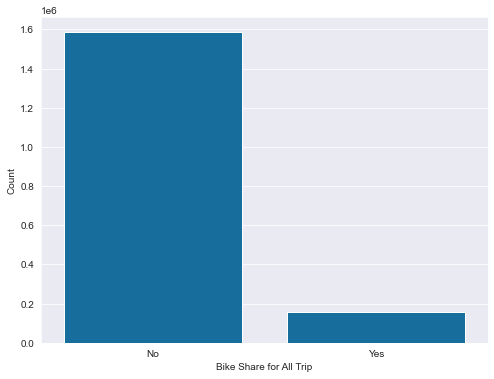

In [24]:
sb.countplot(data=trips18, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

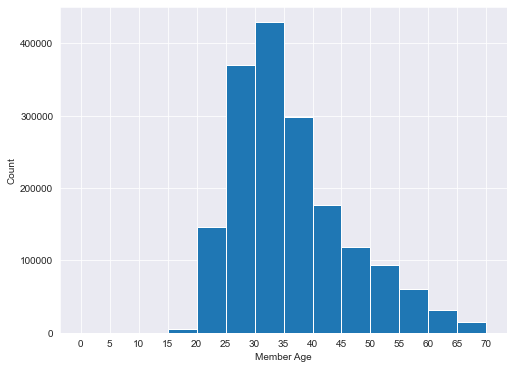

In [25]:
bins = np.arange(0, trips18['member_age'].max()+5, 5)
plt.hist(data=trips18, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');

Most riders were male subscribers who did not use bike share for all trips. Most members were around 25 to 40 years old, corresponding to the trip distribution plots that most trips were on Mon-Fri and maxed during rush hours of a day. As the age gets older, bike usage dropped significantly. 

Trip duration distribution to plot next. 

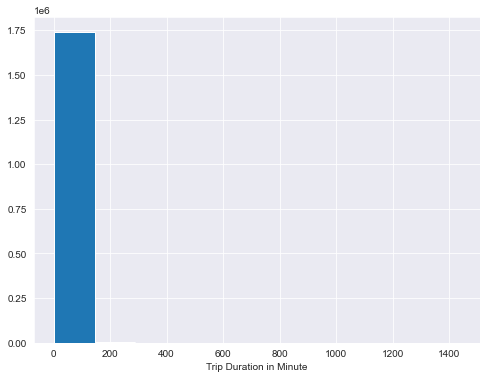

In [26]:
plt.hist(data=trips18, x='duration_minute');
plt.xlabel('Trip Duration in Minute');

It was a little surprising to see the duration distribution spans pretty far to the right (indicates a long time rental, almost 24 hrs) while the majority of the rides were quite short (within 200 mins). Going to zoom in to the most cases for a closer picture of what the distribution is like.   

In [27]:
trips18['duration_minute'].describe(percentiles=[.99])

count    1.745188e+06
mean     1.296786e+01
std      3.311037e+01
min      1.016667e+00
50%      9.050000e+00
99%      6.525000e+01
max      1.438017e+03
Name: duration_minute, dtype: float64

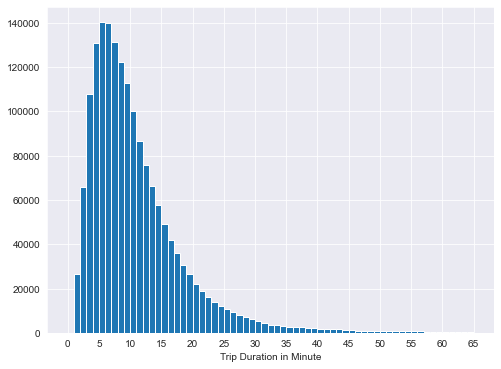

In [28]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=trips18, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

It looks like 99% of the trips were less than 1 hour long with most of them fell between 5 to 10 minutes range. I'll remove the outlier long trips for this study to allow focusing on the most common cases to explore the pattern.

In [29]:
# issue 8: filter out outlier trip records where the duration was very long

trips18 = trips18.query('duration_minute <= 66')
trips18.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727985 entries, 6 to 1863719
Data columns (total 22 columns):
duration_sec               1727985 non-null int64
start_time                 1727985 non-null datetime64[ns]
end_time                   1727985 non-null datetime64[ns]
start_station_id           1727985 non-null object
start_station_name         1716963 non-null object
start_station_latitude     1727985 non-null float64
start_station_longitude    1727985 non-null float64
end_station_id             1727985 non-null object
end_station_name           1716963 non-null object
end_station_latitude       1727985 non-null float64
end_station_longitude      1727985 non-null float64
bike_id                    1727985 non-null object
user_type                  1727985 non-null category
member_birth_year          1727985 non-null int32
member_gender              1727985 non-null category
bike_share_for_all_trip    1727985 non-null object
duration_minute            1727985 non-null float

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The number of trips peaked around 8-9am and 17-18pm during a day, there were more trips on work days (Mon-Fri) compared to weekends. Summar time was the most popular season of a year, likely due to the weather. 

User-wise, there were more male riders than female, and most members were subscribers compared to casual riders. The majority of the members did not use bike share for all of their trips, and most were around 25 to 40 years old. 

Most rides were quick and short, lasted between 5 to 10 minutes, though there were some very long outliers like 24hrs.

No transformation was needed luckily due to the straightforwardness of the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of the trip duration was a little surprising at first plotting out the original data. Used .describe() and xticks() to zoom in to a smaller range where most trip records fell, which made the distribution much clearer. In order to help focusing on the main cases of typical use of the system, I filtered out the outlier long trip records for the study with .query(). 

In [30]:
# save the clean data to a .csv file

trips18.to_csv('fordgobike_trips_2018_clean.csv', index=False)

## Bivariate Exploration

How does the trip duration distribution vary between customers and subscribers?

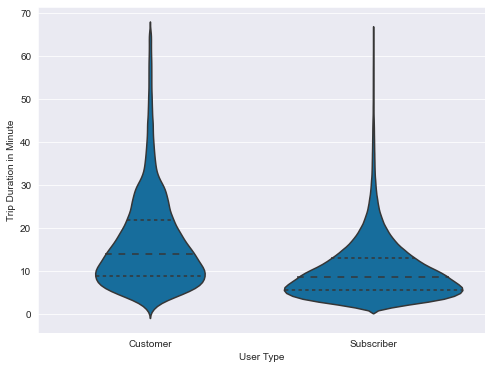

In [31]:
sb.violinplot(data=trips18, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

The trip duration distribution is much narrower for subscribers compared to casual riders on the shorter/quicker trip end overall. It seems like subscribers have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer.   

How does the trip duration distribution vary by gender?

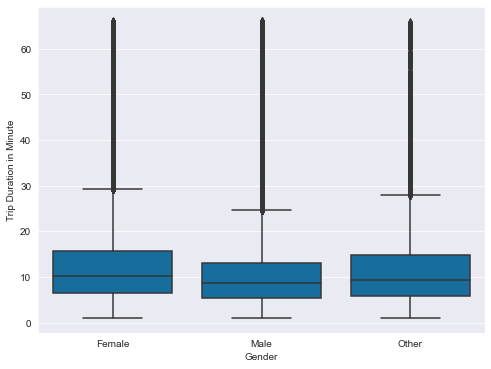

In [32]:
sb.boxplot(data=trips18, x='member_gender', y='duration_minute', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');

Though not a huge difference, male riders tend to have shorter trips compared to female users, indicated by both a smaller median and shorter IQR.  

Average Trip Duration on Weekdays

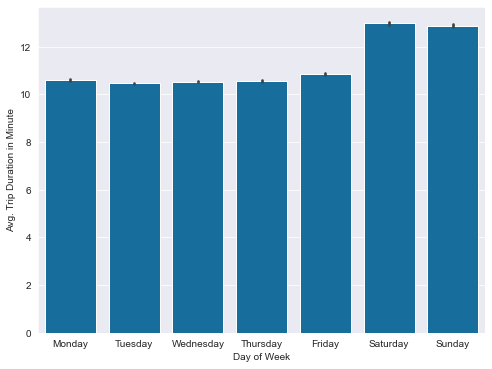

In [33]:
sb.barplot(data=trips18, x='start_dayofweek', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

The riding trips are much shorter on Monday through Friday compared to weekends. It indicates a pretty stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends. 

Average trip duration by month

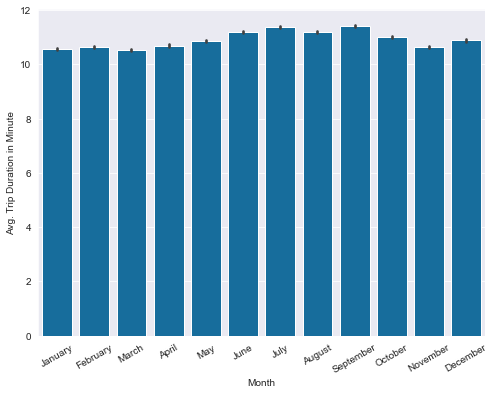

In [34]:
sb.barplot(data=trips18, x='start_month', y='duration_minute', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');

Starting from March, the average usage time shown an increasing trend almost all the way til October before it down turned. The average longest trips happened during the summer months, around June, July and September, which probably has a lot to do with the weather in the area.

Member age by weekdays

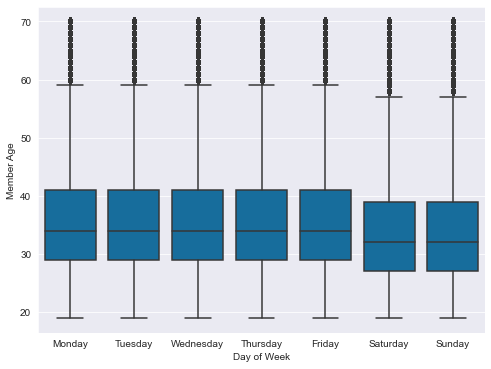

In [35]:
sb.boxplot(data=trips18, x='start_dayofweek', y='member_age', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Member Age');

Riders who rented the bikes Monday through Friday are slightly older than those who ride on weekends, which corresponds to the commute to work usage that was observed from the above univariable exploration plots.  

Weekly usage between customers and subscribers

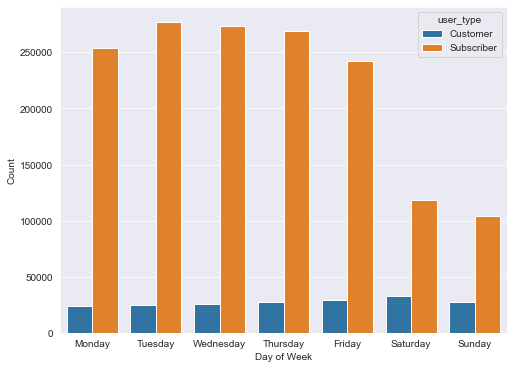

In [36]:
sb.countplot(data=trips18, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

There was much more subscriber usage than casual customers overall. The drop of volume on weekends for subscribers indicates that they primarily ride bikes for work commute during work days, whereas almost the opposite pattern of a slight increase of use for customers on weekends demonstrates that the use was more for leisure/touring and relaxing purposes.  

Daily usage between customers and subscribers

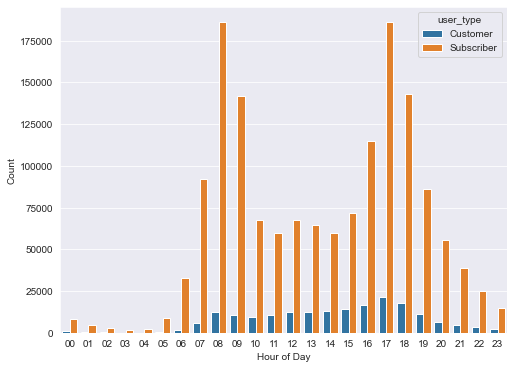

In [37]:
sb.countplot(data=trips18, x='start_hourofday', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

Subscriber usage clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon, double confirmed their usage purpose and goal of riding. Similar pattern was not observed among customers who tend to ride most in the afternoon or early evening as for a different purpose than the subscriber riders.

Yearly usage between customers and subscribers

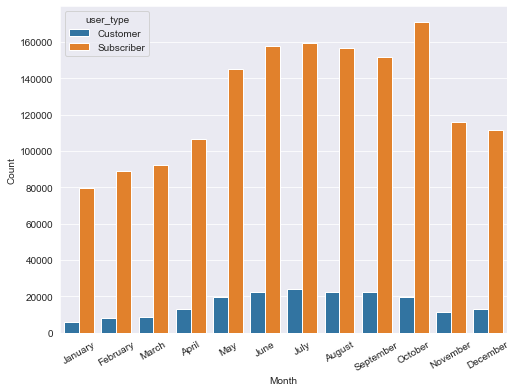

In [38]:
sb.countplot(data=trips18, x='start_month', hue='user_type');
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Count');

Both subscribers and customers ride the most during the summer months with subscribers maxed out in October and customers peaked in July. The usage was clearly not popular during winter season like November, December and January likely due to the weather.

Member age between customers and subscribers

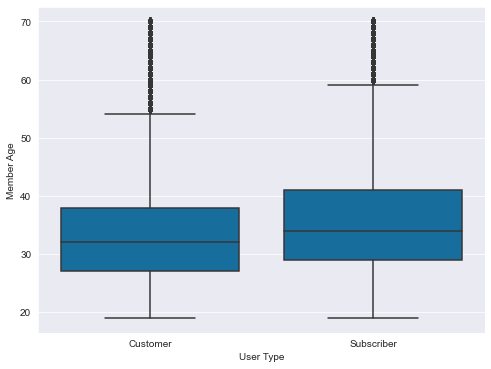

In [39]:
sb.boxplot(data=trips18, x='user_type', y='member_age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Member Age');

Similar to the Member age by weekdays plot, subscribers who ride most often Monday through Friday are slightly older than customers, with a wider range of ages as well. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are a lot more subscriber usage than customers. The riding habit/pattern varies a lot between subscribers and customers. Subscribers use the bike sharing system for work commnute thus most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers tend to ride for fun in the afternoon or early evenings over weekends. Subscriber users are slightly older than customer users who tend to take longer rides overall especially during the summer.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It is interesting to see that subscribers are slightly older than customers on average but take much shorter/quicker rides. And October had the most bike riding usage for subscribers throughout the year. 

## Multivariate Exploration

How does the average trip duration vary in weekdays between customers and subscribers?

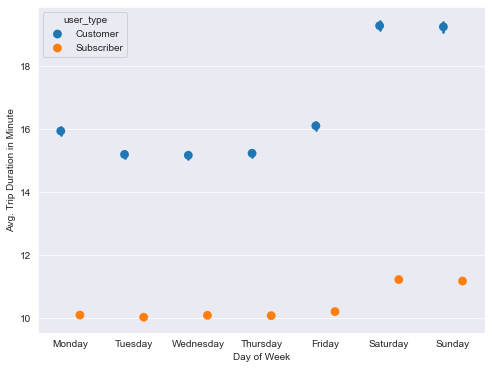

In [40]:
sb.pointplot(data=trips18, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.     

How does the hourly usage vary during weekdays for customers and subscribers?

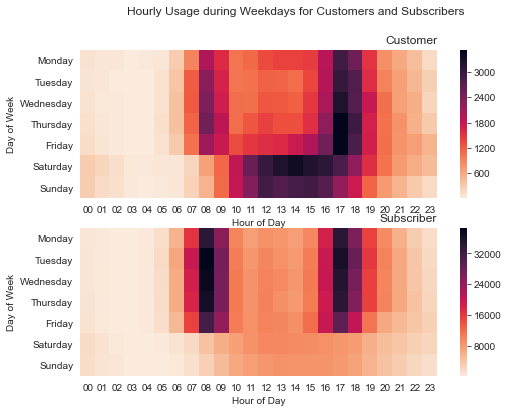

In [41]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = trips18.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = trips18.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

The heatmaps shows clearly very different usage pattern/habit between the two type of riders. Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 17-18pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 17pm Monday to Friday. Other than usage purpose and habit, it may also have to do with the traffic situation around these rush hours in the area.  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over weekends and in the afternoon, for city tour or leisure purpose probably.        

### Were there any interesting or surprising interactions between features?

The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed. The usage habit difference between male and female is not that much or obvious throughout the exploration, which could be related to the imbalanced number of female riders/records compared to male ones. It'd be interesting to see how male and female use the system differently if there were more female data.    